In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
!pip install -U kaleido
import kaleido
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import plotly.express as px
import numpy as np
!pip install country-converter

import country_converter as coco
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 79.9 MB 58.6 MB/s            
     |████████████████████████████████| 51 kB 2.3 MB/s             
  Preparing metadata (setup.py) ... - done
  Created wheel for country-converter: filename=country_converter-0.7.7-py3-none-any.whl size=53788 sha256=d0a5dcb0697b493592cc8c535b9e5e67fc1106c974320de601b2f9eb44f7e28c
  Stored in directory: /root/.cache/pip/wheels/e8/e6/60/61798a8a91462250002293d1c8cc8de90a130119a813277ccc
Successfully built country-converter
/kaggle/input/forbes-worlds-billionaires-list-2022/forbes_2022_billionaires.csv


In [2]:
csv = pd.read_csv('../input/forbes-worlds-billionaires-list-2022/forbes_2022_billionaires.csv')
categories = csv['category'].value_counts().reset_index()
print(categories)
sports = csv[csv['age'] == 100]
sports.head(40)

                         index  category
0        Finance & Investments       392
1                   Technology       343
2                Manufacturing       337
3             Fashion & Retail       250
4                   Healthcare       217
5              Food & Beverage       203
6                  Real Estate       193
7                  Diversified       180
8        Media & Entertainment        99
9                       Energy        95
10                  Automotive        70
11             Metals & Mining        68
12                     Service        53
13  Construction & Engineering        46
14                     Telecom        37
15                   Logistics        35
16                      Sports        27
17          Gambling & Casinos        23


,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
1681,1645,George Joseph,100.0,1800.0,2022,4,Finance & Investments,insurance,United States,California,...,NaN,True,M,1921-09-11,NaN,NaN,"Los Angeles-Long Beach-Santa Ana, CA",NaN,George Joseph is the founder of Mercury Genera...,Joseph named the company after the Roman god M...


In [3]:
algo = csv.isnull()
loss_values = algo.sum()
total_values = algo.count()
hechos = csv[csv['selfMade'] == True]
hechos = hechos.shape[0]
nh = csv[csv['selfMade'] == False]
nh = nh.shape[0]
#print(loss_values, total_values, otro)
df1 = csv['category'].value_counts().reset_index()
index = pd.Index(['Hechos', 'Heredados'])
df1 = pd.DataFrame({'Cantidad': [hechos,nh]})
df1 = df1.set_index(index)
fig = px.bar(df1, x = df1.index, y = df1['Cantidad'], color =df1['Cantidad'],
             color_continuous_scale ='bluyl',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Billonarios hechos vs billonarios heredados',
                  title_x = 0.5,
                  title_font = dict(size = 20, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Industry'),
                  yaxis = dict(title = 'Count')
                 )
fig.show()
fig.write_image("./fig01.png",scale = 3, width = 800, height = 450,engine = 'kaleido')

In [4]:
csv['category'].unique().size

18

In [5]:
df1 = csv['category'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['category'], color =df1['category'],
             color_continuous_scale ='sunset',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=45, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Top industrias de los billonarios',
                  title_x = 0.5,
                  title_font = dict(size = 20, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Industry'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig1.png",scale = 3, width = 800, height = 450,engine = 'kaleido')

In [6]:
df01 = csv[csv['selfMade']==True]
df1 = df01['category'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['category'], color =df1['category'],
             color_continuous_scale ='sunset',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=45, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Top industrias de los billonarios que construyeron su propia fortuna',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Industry'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig2.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [7]:
#df01 = csv[csv['selfMade']==True]
df1 = csv['age'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['age'], color =df1['age'],
             color_continuous_scale ='rdbu',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Edad de los billonarios',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Edad'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig3.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [8]:
"""import plotly.figure_factory as ff
here im writing some important stuff
df1 = csv['age'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['age'], color =df1['age'],
             color_continuous_scale ='rdbu',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Top industrias de los billonarios del mundo que construyeron su fortuna ellos mismos',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Source'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()"""

'import plotly.figure_factory as ff\nhere im writing some important stuff\ndf1 = csv[\'age\'].value_counts().reset_index()\n\nfig = px.bar(df1, x = df1[\'index\'], y = df1[\'age\'], color =df1[\'age\'],\n             color_continuous_scale =\'rdbu\',\n             labels = {"index":"source","Source":"count"})\n\nfig.update_xaxes(tickangle=0, tickfont=dict(color=\'Indigo\'))\n\nfig.update_layout(title = \'Top industrias de los billonarios del mundo que construyeron su fortuna ellos mismos\',\n                  title_x = 0.5,\n                  title_font = dict(size = 22, family = \'Balto\', color = \'Indigo\'),\n                  xaxis = dict(title = \'Source\'),\n                  yaxis = dict(title = \'Count\')\n                 \n                 )\nfig.show()'

In [9]:
df01 = csv[csv['selfMade']==True]
df1 = df01['age'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['age'], color =df1['age'],
             color_continuous_scale ='rdbu',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Edad de los billonarios que construyeron su propia fortuna',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Edad'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig4.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [10]:
"""fig, ax1 = plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = csv,x = 'age', ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"fig, ax1 = plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = csv,x = 'age', ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [11]:
"""fig, ax1 = plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = selfmades,x = 'age', ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"fig, ax1 = plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = selfmades,x = 'age', ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [12]:
most_countries = csv.groupby('country').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()
#df01 = csv[csv['selfMade']==True]
#df1 = df01['category'].value_counts().reset_index()

fig = px.bar(most_countries, x = most_countries['country'], y = most_countries['personName'], color =most_countries['personName'],
             color_continuous_scale ="magenta",
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=45, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Pais de residencia de los billonarios',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'País'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig5.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [13]:
df01 = csv[csv['selfMade']==True]
most_countries = df01.groupby('countryOfCitizenship').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()

#df1 = df01['category'].value_counts().reset_index()

fig = px.bar(most_countries, x = most_countries['countryOfCitizenship'], y = most_countries['personName'], color =most_countries['personName'],
             color_continuous_scale ="magenta",
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=45, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Nacionalidad de los billonarios que construyeron su propia fortuna',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'País'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig6.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [14]:
"""most_countries = csv.groupby('country').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()
print(most_countries)
more15 = most_countries['country']
#print(more15)
para_plot = csv[csv['country'].isin(more15)]
#print(para_plot)
fig, ax1= plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = para_plot, x = 'country',ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"most_countries = csv.groupby('country').count()['personName']\nmost_countries = most_countries.sort_values(ascending = False)\nmost_countries = most_countries.iloc[range(0,20)].reset_index()\nprint(most_countries)\nmore15 = most_countries['country']\n#print(more15)\npara_plot = csv[csv['country'].isin(more15)]\n#print(para_plot)\nfig, ax1= plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = para_plot, x = 'country',ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [15]:

def name_isalpha(country):
    country = coco.convert(names=country, to='ISO3')
    return country

df01 = csv[csv['selfMade']==True]
most_countries = df01.groupby('countryOfCitizenship').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.reset_index()
print(most_countries)
most_countries['new_name'] = most_countries['countryOfCitizenship'].apply(name_isalpha)
np.random.seed(12)


fig = px.choropleth(most_countries, locations="new_name",
                    color="personName", 
                    hover_name="countryOfCitizenship", # column to add to hover information
                    color_continuous_scale='deep')

fig.show()
fig.write_image("./fig7.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

    countryOfCitizenship  personName
0          United States         541
1                  China         524
2                 Russia          83
3                  India          80
4                 Canada          49
..                   ...         ...
63  Eswatini (Swaziland)           1
64               Estonia           1
65               Denmark           1
66              Barbados           1
67              Zimbabwe           1

[68 rows x 2 columns]


In [16]:
"""most_countries = selfmades.groupby('country').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()
#print(most_countries)
more15 = most_countries['country']
#print(more15)
para_plot = selfmades[selfmades['country'].isin(more15)]
#print(para_plot)
fig, ax1= plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = para_plot, x = 'country',ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"most_countries = selfmades.groupby('country').count()['personName']\nmost_countries = most_countries.sort_values(ascending = False)\nmost_countries = most_countries.iloc[range(0,20)].reset_index()\n#print(most_countries)\nmore15 = most_countries['country']\n#print(more15)\npara_plot = selfmades[selfmades['country'].isin(more15)]\n#print(para_plot)\nfig, ax1= plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = para_plot, x = 'country',ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [17]:
"""most_countries['new_name'] = most_countries['country'].apply(name_isalpha)
np.random.seed(12)


fig = px.choropleth(most_countries, locations="new_name",
                    color="personName", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()"""

'most_countries[\'new_name\'] = most_countries[\'country\'].apply(name_isalpha)\nnp.random.seed(12)\n\n\nfig = px.choropleth(most_countries, locations="new_name",\n                    color="personName", \n                    hover_name="country", # column to add to hover information\n                    color_continuous_scale=px.colors.sequential.Plasma)\n\nfig.show()'

In [18]:
"""most_countries = selfmades.groupby('countryOfCitizenship').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()
#print(most_countries)
more15 = most_countries['countryOfCitizenship']
#print(more15)
para_plot = selfmades[selfmades['countryOfCitizenship'].isin(more15)]
#print(para_plot)
fig, ax1= plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = para_plot, x = 'countryOfCitizenship',ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"most_countries = selfmades.groupby('countryOfCitizenship').count()['personName']\nmost_countries = most_countries.sort_values(ascending = False)\nmost_countries = most_countries.iloc[range(0,20)].reset_index()\n#print(most_countries)\nmore15 = most_countries['countryOfCitizenship']\n#print(more15)\npara_plot = selfmades[selfmades['countryOfCitizenship'].isin(more15)]\n#print(para_plot)\nfig, ax1= plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = para_plot, x = 'countryOfCitizenship',ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [19]:
"""most_countries['new_name'] = most_countries['countryOfCitizenship'].apply(name_isalpha)
np.random.seed(12)


fig = px.choropleth(most_countries, locations="new_name",
                    color="personName", 
                    hover_name="countryOfCitizenship", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()"""

'most_countries[\'new_name\'] = most_countries[\'countryOfCitizenship\'].apply(name_isalpha)\nnp.random.seed(12)\n\n\nfig = px.choropleth(most_countries, locations="new_name",\n                    color="personName", \n                    hover_name="countryOfCitizenship", # column to add to hover information\n                    color_continuous_scale=px.colors.sequential.Plasma)\n\nfig.show()'

In [20]:
"""most_countries = csv.groupby('countryOfCitizenship').count()['personName']
most_countries = most_countries.sort_values(ascending = False)
most_countries = most_countries.iloc[range(0,20)].reset_index()
#print(most_countries)
more15 = most_countries['countryOfCitizenship']
#print(more15)
para_plot = csv[csv['countryOfCitizenship'].isin(more15)]
#print(para_plot)
fig, ax1= plt.subplots(1,1, figsize = (10,5))
plot = sns.histplot(data = para_plot, x = 'countryOfCitizenship',ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
plt.xticks(rotation=80)"""

"most_countries = csv.groupby('countryOfCitizenship').count()['personName']\nmost_countries = most_countries.sort_values(ascending = False)\nmost_countries = most_countries.iloc[range(0,20)].reset_index()\n#print(most_countries)\nmore15 = most_countries['countryOfCitizenship']\n#print(more15)\npara_plot = csv[csv['countryOfCitizenship'].isin(more15)]\n#print(para_plot)\nfig, ax1= plt.subplots(1,1, figsize = (10,5))\nplot = sns.histplot(data = para_plot, x = 'countryOfCitizenship',ax = ax1)\n#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)\nplt.xticks(rotation=80)"

In [21]:
"""most_countries['new_name'] = most_countries['countryOfCitizenship'].apply(name_isalpha)
np.random.seed(12)


fig = px.choropleth(most_countries, locations="new_name",
                    color="personName", 
                    hover_name="countryOfCitizenship", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()"""

'most_countries[\'new_name\'] = most_countries[\'countryOfCitizenship\'].apply(name_isalpha)\nnp.random.seed(12)\n\n\nfig = px.choropleth(most_countries, locations="new_name",\n                    color="personName", \n                    hover_name="countryOfCitizenship", # column to add to hover information\n                    color_continuous_scale=px.colors.sequential.Plasma)\n\nfig.show()'

In [22]:
#df01 = csv[csv['selfMade']==True]
df1 = csv['gender'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['gender'], color =df1['gender'],
             color_continuous_scale ='redor',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Cantidad de billonarios por género',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Género'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig8.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [23]:
"""print(csv.shape)
fig, ax1= plt.subplots(1,1, figsize = (5,5))
plot = sns.histplot(data = selfmades, x = 'gender',ax = ax1)
#ax1.set_xlabels(ax1.get_xlabels(), rotation = 45)
#plt.xticks(rotation=80)"""
df01 = csv[csv['selfMade']==True]
df1 = df01['gender'].value_counts().reset_index()

fig = px.bar(df1, x = df1['index'], y = df1['gender'], color =df1['gender'],
             color_continuous_scale ='redor',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Cantidad de billonarios que construyeron su propia fortuna por género',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Género'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig9.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [24]:
selfm = csv[csv['selfMade'] == True]
muj = selfm[selfm['gender'] == 'F']
muj1 = muj['countryOfCitizenship'].value_counts().reset_index()
print(muj1)
fig = px.bar(muj1, x = muj1['index'], y = muj1['countryOfCitizenship'], color =muj1['countryOfCitizenship'],
             color_continuous_scale ='tealrose',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=40, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Nacionalidad de las mujeres billonarias que construyeron su propia fotuna',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Country'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig91.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

             index  countryOfCitizenship
0            China                    44
1    United States                    20
2        Hong Kong                     5
3           Canada                     3
4           Brazil                     2
5      Philippines                     2
6   United Kingdom                     2
7            India                     2
8           Russia                     2
9         Barbados                     1
10       Singapore                     1
11       Indonesia                     1
12     South Korea                     1
13           Italy                     1
14         Vietnam                     1
15       Australia                     1
16         Germany                     1


12687950.0


<BarContainer object of 49 artists>

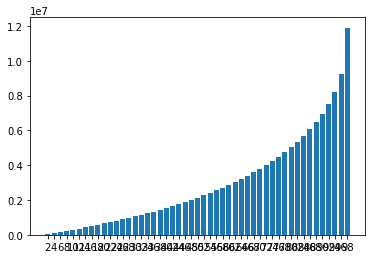

In [25]:
distribution = {'value': [], 'money': []}
allmoney = csv.head(2650)['finalWorth'].sum()
print(allmoney)
counter = 0;
percentage = 0;
summon = 0
for a in range(csv.head(2650).shape[0]):
    #print(summon)
    summon = summon + csv.iloc[2650-a]['finalWorth']
    if counter == 53:
        percentage = percentage + 2
        distribution['value'].append(percentage)
        distribution['money'].append(summon)
        counter = 0
    else:
        counter +=1
left = range(0,49)
height = distribution['money']
label = distribution['value']
plt.bar(left, height, tick_label = label,
        width = 0.8)

In [26]:
values = {'money': [], 'value': []}
money = 0
counter = 0
prueba = 0
for a in csv.iterrows():
    
    if counter == 133:
        values['money'].append(money)
        try:
            values['value'].append(values['value'][-1]+5)
        except: 
            values['value'].append(5)
        counter = 0
        money = 0
    money = money + a[1]['finalWorth']
    counter +=1
values['value%'] = []
for a in values['value']:
    values['value%'].append(str(a)+'%')
#values

<BarContainer object of 20 artists>

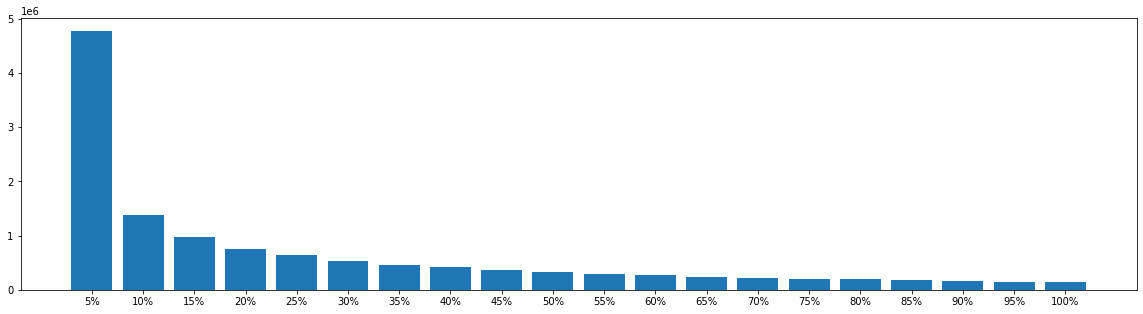

In [27]:
left = range(0,len(values['money']))
height = values['money']
label = values['value%']
fig, ax1= plt.subplots(1,1, figsize = (20,5))
plt.bar(left, height, tick_label = label,
        width = 0.8)

In [28]:
#df01 = csv[csv['selfMade']==True]

height = values['money']
label = values['value%']
df1 = pd.DataFrame({'money': height, 'value%': label})
fig = px.bar(df1, x = df1['value%'], y = df1['money'], color =df1['money'],
             color_continuous_scale ='tropic',
             labels = {"index":"source","Source":"count"})

fig.update_xaxes(tickangle=0, tickfont=dict(color='Indigo'))

fig.update_layout(title = 'Distribución de la riqueza entre billonarios',
                  title_x = 0.5,
                  title_font = dict(size = 22, family = 'Balto', color = 'Indigo'),
                  xaxis = dict(title = 'Porcentaje'),
                  yaxis = dict(title = 'Count')
                 
                 )
fig.show()
fig.write_image("./fig10.png",scale = 3, width = 800, height = 450, engine = 'kaleido')

In [29]:
print(sum(values['money'][1:]), values['money'][0], csv.shape)

7924050.0 4773900.0 (2668, 22)
